In [12]:
# Imports
from scapy.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
# cargar el dataset preprocesado
df = pd.read_csv('archivo_completo_limpio.csv', sep=',', encoding='utf-8')

In [14]:
# separar el dataset en datos y etiquetas
x = df.drop(['Label'], axis=1)
y = df['Label']

In [15]:
# dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

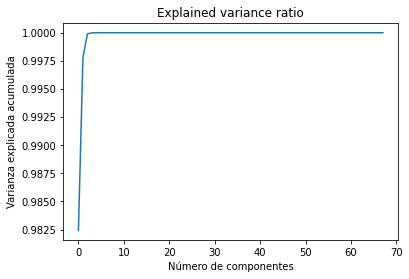

In [16]:
# fit and graph the explained variance ratio
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

In [17]:
no_components = 10

In [18]:
# aplicando PCA
pca = PCA(n_components=no_components)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [19]:
# convertir los datos a un dataframe
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [20]:
# check shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5568, 10)
(1392, 10)
(5568,)
(1392,)


In [21]:
# crear el modelo de regresión lineal
model = LinearRegression()

# entrenar el modelo
model.fit(x_train, y_train)

# predecir los valores de prueba
y_pred = model.predict(x_test)

# validación
print('Accuracy: ', model.score(x_test, y_test))
print('Cross validation: ', cross_val_score(model, x_test, y_test, cv=5))
print('Mean cross validation: ', cross_val_score(model, x_test, y_test, cv=5).mean())
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred.round()))
print('Classification report: \n', classification_report(y_test, y_pred.round()))


Accuracy:  0.21662220315954328
Cross validation:  [ 2.13438419e-01  1.78449170e-01  2.25473469e-01 -9.59971775e+08
  2.03286244e-01]
Mean cross validation:  -191994354.9324866
Confusion matrix: 
 [[  0   0   0   0   0]
 [  2  53 265  32   0]
 [  0   1 164 172   6]
 [  0   8 160 163  13]
 [  0   0  95 256   2]]


c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.85      0.15      0.26       352
         1.0       0.24      0.48      0.32       343
         2.0       0.26      0.47      0.34       344
         3.0       0.10      0.01      0.01       353

    accuracy                           0.27      1392
   macro avg       0.29      0.22      0.18      1392
weighted avg       0.36      0.27      0.23      1392

